In [ ]:
#find indicies of peaks
#load in big ribosome stack
#Loop for 100 to 1000 principal components
#Save PCA (i, pixels, pixels)
#Reconstruct certain templates
#write to image stack {92, pixels, pixels)

In [11]:
import numpy as np
star = np.loadtxt("peaks.txt")
print(star.shape)
important = star[:, 3:6]


(92, 9)


In [ ]:
important[40]

In [12]:
big_star = np.loadtxt("correct_star.star", skiprows=30)
big_star[0]
big_important = big_star[:, 1:4]
big_important.shape


(1588800, 3)

In [ ]:
big_important[30000]

In [ ]:
big_important[485619]

In [ ]:
abs(important[70][2]- big_important[485619][2])

In [ ]:
np.max(important[:,2])

In [ ]:
np.max(big_important[:,2])

In [ ]:
big_important[2]

In [ ]:
max_diff = 175
for j in range(big_important.shape[0]):
    if((abs(important[0][0] - big_important[j][0]) <= max_diff) and  (abs(important[0][1] - big_important[j][1]) <= max_diff) and (abs(important[0][2] - big_important[j][2]) <= max_diff) ):
        print(j)

In [13]:
mapper = {}
max_diff = 2.5
for i in range(important.shape[0]):
    possible = []
    for j in range(big_important.shape[0]):
        if(abs(important[i][0] - big_important[j][0]) <= max_diff):
            possible.append(j)
    
    k = 0
    while(k<len(possible)):
        # if(k>= len(possible)):
        #     continue
        
        if(abs(important[i][1] - big_important[possible[k]][1]) > max_diff):
            possible.pop(k)
            k-=1
        k+=1
    l = 0
    while(l<len(possible)):
        # if(l>= len(possible)):
        #     continue
        
        if(abs(important[i][2] - big_important[possible[l]][2]) > max_diff):
            possible.pop(l)
            l-=1
        l+=1
    mapper[i] = possible
    # print(i)
    

In [14]:
    max_diff = 3.5
    possible = []
    for j in range(big_important.shape[0]):
        if(abs(important[40][0] - big_important[j][0]) <= max_diff):
            possible.append(j)
    
    k = 0
    while(k<len(possible)):
        # if(k>= len(possible)):
        #     continue
        
        if(abs(important[40][1] - big_important[possible[k]][1]) > max_diff):
            possible.pop(k)
            k-=1
        k+=1
    l = 0
    while(l<len(possible)):
        # if(l>= len(possible)):
        #     continue
        
        if(abs(important[40][2] - big_important[possible[l]][2]) > max_diff):
            possible.pop(l)
            l-=1
        l+=1
    mapper[40] = possible

In [15]:
count  = 0
for i in range(len(mapper)):
    if len(mapper[i]) ==0:
        count +=1
        
        
count

0

In [ ]:
mapper[40]

In [19]:
type(mapper)


dict

In [20]:
correct_mapper = {}

for key, val in mapper.items():
    smallest = 100
    index = None
    for i in val:
        diff = abs(important[key][0] - big_important[i][0]) + abs(important[key][1] - big_important[i][1]) + abs(important[key][2] - big_important[i][2])
        if(diff < smallest):
            smallest = diff
            index = i
    correct_mapper[key] = index

In [21]:
correct_mapper

{0: 946334,
 1: 295158,
 2: 1381314,
 3: 1004195,
 4: 1353169,
 5: 517127,
 6: 398544,
 7: 126333,
 8: 707961,
 9: 1083356,
 10: 560353,
 11: 853635,
 12: 1214761,
 13: 712315,
 14: 1240222,
 15: 680113,
 16: 197055,
 17: 303448,
 18: 169661,
 19: 938652,
 20: 948017,
 21: 311322,
 22: 113137,
 23: 1328565,
 24: 1308720,
 25: 1491465,
 26: 1403775,
 27: 953530,
 28: 584804,
 29: 886659,
 30: 519564,
 31: 1083380,
 32: 783425,
 33: 990963,
 34: 1066329,
 35: 1242858,
 36: 921189,
 37: 612005,
 38: 369144,
 39: 1545204,
 40: 1580564,
 41: 232776,
 42: 1010899,
 43: 682102,
 44: 1516363,
 45: 1066119,
 46: 657035,
 47: 1031495,
 48: 1286813,
 49: 333767,
 50: 740712,
 51: 886098,
 52: 699345,
 53: 1236321,
 54: 1009868,
 55: 855034,
 56: 1380463,
 57: 673154,
 58: 1157477,
 59: 577873,
 60: 659571,
 61: 293566,
 62: 503279,
 63: 92153,
 64: 201568,
 65: 495883,
 66: 756735,
 67: 143503,
 68: 1080494,
 69: 101950,
 70: 887139,
 71: 813022,
 72: 769913,
 73: 856860,
 74: 692170,
 75: 115297

In [24]:
important[1]

array([297.75,  50.  , 325.5 ])

In [25]:
big_important[295158]

array([297.      ,  50.      , 323.999908])

In [29]:
def load_MRC(file_path):
    import mrcfile 
    with mrcfile.open(file_path) as mrc:
        a= mrc.data

    return a


In [30]:
def apply_pca(image, n_components):
    import numpy as np
    from sklearn.decomposition import TruncatedSVD
    pca = TruncatedSVD(n_components=n_components)
    image = image - (np.mean(image))
    transformed_image = pca.fit_transform(image)
    return transformed_image,pca

In [31]:
def reconstruct_image(pca, transformed_image):
    reconstructed_image = pca.inverse_transform(transformed_image)
    return reconstructed_image


In [32]:
correct_mapper = {0:2, 1:4, 2:7, 3:11, 4:15}

In [46]:
import mrcfile 
import numpy as np
import os
# path = input("MRC File (Templates): ")
# folder = input("Folder Name:")
path  = "small_ribosome.mrc"
folder = "small_ribosome_tester"


templates = load_MRC(path)
num_of_images = templates.shape[0]
x_pixels = templates.shape[1]
y_pixels = templates.shape[2]

#Create folder
newpath = r'/home/useradmin/Project_cisTEM/' + folder
if not os.path.exists(newpath):
    os.makedirs(newpath)

i = 1
while(i<=5):
    A=np.reshape(templates,(x_pixels*y_pixels, templates.shape[0]))
    pca_mrc, pca = apply_pca(A, i)
    r = reconstruct_image(pca, pca_mrc)
    reconstructed = np.reshape(r, (num_of_images, x_pixels, y_pixels))
    rec_matrix = np.zeros((92, templates.shape[1], templates.shape[2]), dtype='float32')
    
    for key, val  in correct_mapper.items():
        rec_matrix[key] = reconstructed[val]
        
        
    
    

    
    name = str(i) + " components " + "ribosome.mrc"
    with mrcfile.new("PCA " + name, overwrite=True) as mrc: 
        # first = np.array()
        # for key, val in mapper:
        #     first = np.append(first, pca_mrc[val])
        #     first = np.reshape(first, (i, templates.shape[1], templates.shape[2]))
        

        mrc._set_voxel_size(1.5, 1.5, 1.5)

    

        mrc.set_data(np.reshape(pca_mrc, (i, x_pixels, y_pixels)))

    mrc.close()


    with mrcfile.new("Reconstructed " + name, overwrite=True) as mrc: 
        # first = np.zeros(())
        # for key, val in mapper:
        #     first = np.append(first, reconstructed[val])
        #     first = np.reshape(first, (i, templates.shape[1], templates.shape[2]))
        

        mrc._set_voxel_size(1.5, 1.5, 1.5)
        mrc.set_data(rec_matrix)

    mrc.close()
    
    i += 1

    os.rename("PCA " +name, folder + "/" + "PCA " +name)
    os.rename("Reconstructed " +name, folder + "/" + "Reconstructed " +name)
    

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


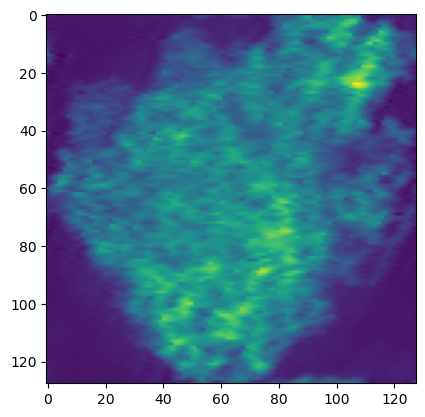

In [55]:
test = load_MRC("small_ribosome_tester/Reconstructed 5 components ribosome.mrc")
import matplotlib.pyplot as plt
plt.imshow(test[1])

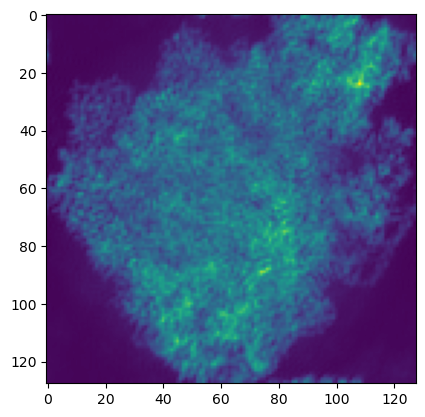

In [56]:
test = load_MRC("small_ribosome.mrc")
import matplotlib.pyplot as plt
plt.imshow(test[4])